<a href="https://colab.research.google.com/github/HidellaS/Malaria-Diagnosis/blob/main/Maleria_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import the libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

# Load the data

In [2]:
dataset, dataset_info = tfds.load('malaria', with_info=True, as_supervised=True, shuffle_files=True, split=['train'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incomplete73NX9D/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [3]:
dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [4]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir=PosixGPath('/tmp/tmpzc8qrgo7tfds'),
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear images},


In [5]:
for data in dataset[0].take(2):
  print(data)

(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(115, 157, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
       

In [6]:
def splits(dataset, TRAIN_RATIO, VAL_RATIO):

  # Calculate split indices
  DATASET_SIZE = len(dataset)
  train_size = int(TRAIN_RATIO * DATASET_SIZE)
  val_size = int(VAL_RATIO * DATASET_SIZE)

  # Split dataset
  train_dataset = dataset.take(train_size)
  val_dataset = dataset.skip(train_size).take(val_size)
  test_dataset = dataset.skip(train_size + val_size)

  return train_dataset, val_dataset, test_dataset

In [7]:
TRAIN_RATIO = 0.6
VAL_RATIO = 0.2

In [8]:
train_dataset, val_dataset, test_dataset = splits(dataset[0], TRAIN_RATIO, VAL_RATIO)


# Print the splits
print(list(train_dataset.take(1).as_numpy_iterator()))
print(list(val_dataset.take(1).as_numpy_iterator()))
print(list(test_dataset.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 0)]
[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

# Data Visualization

<ipython-input-9-e541c842c408>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(4, 4, i+1)


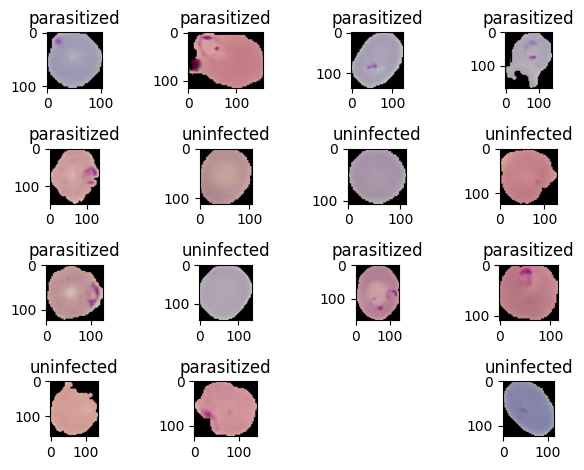

In [9]:
for i, (image, label) in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4, 4, i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.tight_layout()

# Data Preprocessing

In [10]:
IM_SIZE = 224
def resizing_and_rescale(image, label):
  return tf.image.resize(image, (IM_SIZE, IM_SIZE))/255.0, label

In [11]:
train_dataset = train_dataset.map(resizing_and_rescale)
val_dataset = val_dataset.map(resizing_and_rescale)
test_dataset = test_dataset.map(resizing_and_rescale)

In [12]:
for img, label in train_dataset.take(1):
  print(img, label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [13]:
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [14]:
val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Model Creation

In [15]:
from tensorflow.keras.layers import Dense, InputLayer, Conv2D, MaxPool2D, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy

In [16]:
model = tf.keras.Sequential([

    InputLayer(input_shape= (IM_SIZE, IM_SIZE, 3)),

    Conv2D(filters=6, kernel_size=3, strides=1, padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),

    Conv2D(filters=16, kernel_size=3, strides=1, padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),

    Flatten(),

    Dense(1000, activation='relu'),
    BatchNormalization(),
    Dense(100, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid'),

])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                        

### Compile the model

In [18]:
model.compile(optimizer=Adam(learning_rate=0.1),
              loss=BinaryCrossentropy(),
              metrics='accuracy')

In [19]:
history_1 = model.fit(train_dataset,
                      validation_data=val_dataset,
                      epochs=2,
                      verbose=1)

Epoch 1/2
517/517 [==============================] - 67s 109ms/step - loss: 0.6735 - accuracy: 0.6308 - val_loss: 0.7092 - val_accuracy: 0.6454
Epoch 2/2
517/517 [==============================] - 44s 85ms/step - loss: 0.6217 - accuracy: 0.6687 - val_loss: 0.9383 - val_accuracy: 0.5676


# plot loss and accuracy curves

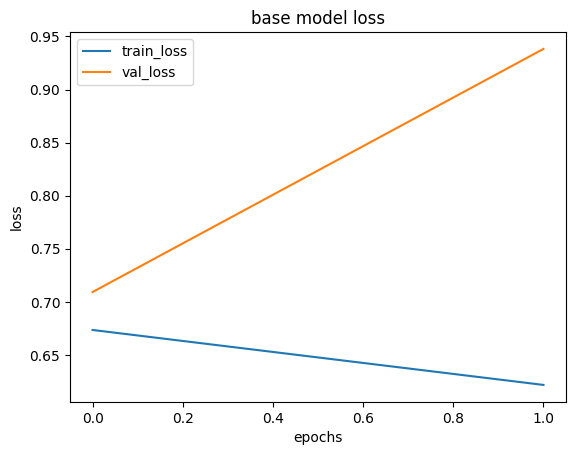

In [20]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('base model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.show()

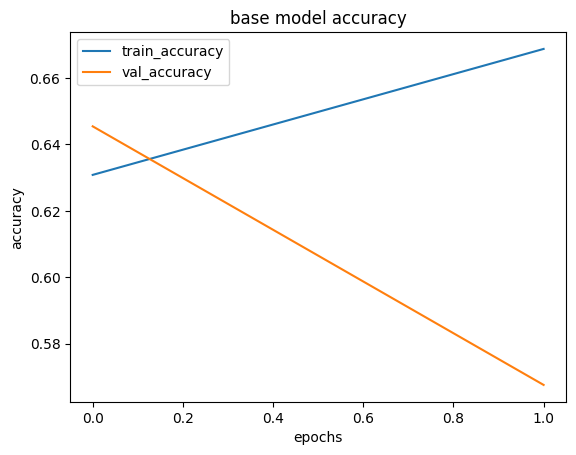

In [21]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('base model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

# Evaluate the model

In [22]:
test_dataset = test_dataset.batch(1)

In [23]:
model.evaluate(test_dataset)

5513/5513 [==============================] - 33s 4ms/step - loss: 0.9440 - accuracy: 0.5685


[0.9439535737037659, 0.568474531173706]

# Model Predictions

In [24]:
model.predict(test_dataset.take(1))[0][0]

1/1 [==============================] - 10s 10s/step


0.00017664439

In [25]:
def parasite_or_not(x):
  if(x<0.5):
    return str('P')
  else:
    return str('U')

1/1 [==============================] - 0s 17ms/step


<ipython-input-26-4fd05941fb86>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3, 3,i+1)


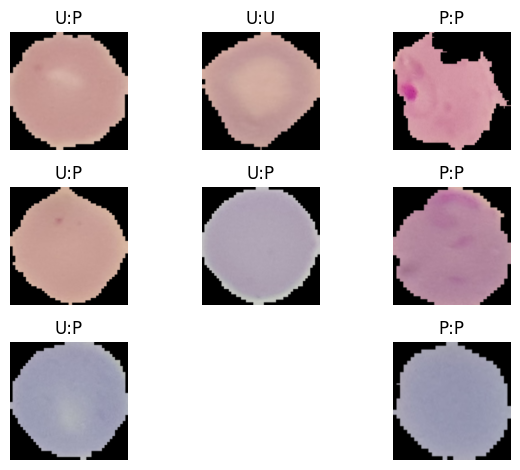

In [26]:
for i, (image, label) in enumerate(test_dataset.take(9)):
  ax = plt.subplot(3, 3,i+1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0])) + ":" + str(parasite_or_not(model.predict(image)[0][0])))
  plt.axis('off')
  plt.tight_layout()

# Save and load the model

In [27]:
model.save('base_model')

In [28]:
loaded_model = tf.keras.models.load_model('base_model')

In [29]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                        

In [30]:
model.save('base_model.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
hdf5_loaded_model = tf.keras.models.load_model('base_model.hdf5')

In [32]:
hdf5_loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                        

### Save the weights and biases

In [33]:
model.save_weights('weights/base_model_weights')

In [34]:
model.load_weights('weights/base_model_weights')

In [35]:
model.evaluate(test_dataset)

5513/5513 [==============================] - 33s 4ms/step - loss: 0.9448 - accuracy: 0.5685


[0.9447776079177856, 0.568474531173706]

# Save the model to google drive

In [36]:
from google.colab import drive

In [37]:
# mount the drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [38]:
# !cp -r /content/base_model/ /content/drive/MyDrive/base_model/

# Model Creation with functional API

In [39]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [40]:
func_input = Input(shape = (IM_SIZE, IM_SIZE, 3), name='Input_Image')

x = Conv2D(filters=6, kernel_size=3, strides=1, padding='valid', activation='relu')(func_input)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=2, strides=2)(x)
x = Conv2D(filters=16, kernel_size=3, strides=1, padding='valid', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=2, strides=2)(x)

x = Flatten()(x)

x = Dense(100, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(10, activation='relu')(x)
x = BatchNormalization()(x)

func_output = Dense(1, activation='sigmoid')(x)



func_model = Model(func_input, func_output, name='func_model')

In [41]:
func_model.summary()

Model: "func_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_4 (Bat  (None, 222, 222, 6)       24        
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_5 (Bat  (None, 109, 109, 16)      6

In [42]:
func_model.compile(optimizer=Adam(learning_rate=0.1),
              loss=BinaryCrossentropy(),
              metrics='accuracy')

In [43]:
history_2 = func_model.fit(train_dataset,
                      validation_data=val_dataset,
                      epochs=5,
                      verbose=1)

Epoch 1/5
517/517 [==============================] - 42s 75ms/step - loss: 0.6238 - accuracy: 0.6567 - val_loss: 1.0101 - val_accuracy: 0.5291
Epoch 2/5
517/517 [==============================] - 41s 80ms/step - loss: 0.4852 - accuracy: 0.7647 - val_loss: 1.7638 - val_accuracy: 0.7645
Epoch 3/5
517/517 [==============================] - 36s 69ms/step - loss: 0.2678 - accuracy: 0.9160 - val_loss: 0.2726 - val_accuracy: 0.9035
Epoch 4/5
517/517 [==============================] - 47s 91ms/step - loss: 0.2557 - accuracy: 0.9192 - val_loss: 0.6352 - val_accuracy: 0.8514
Epoch 5/5
517/517 [==============================] - 45s 87ms/step - loss: 0.2551 - accuracy: 0.9185 - val_loss: 0.7794 - val_accuracy: 0.4876


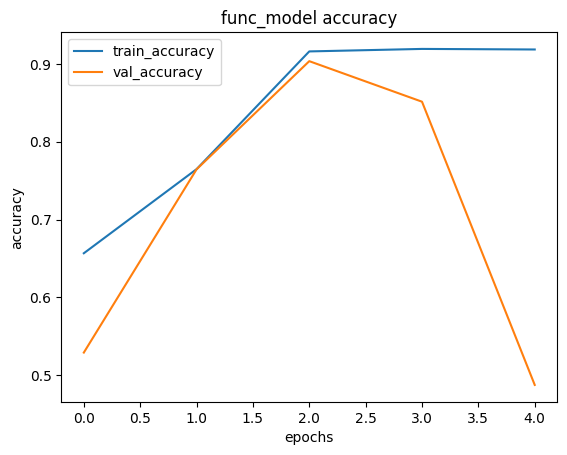

In [44]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('func_model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

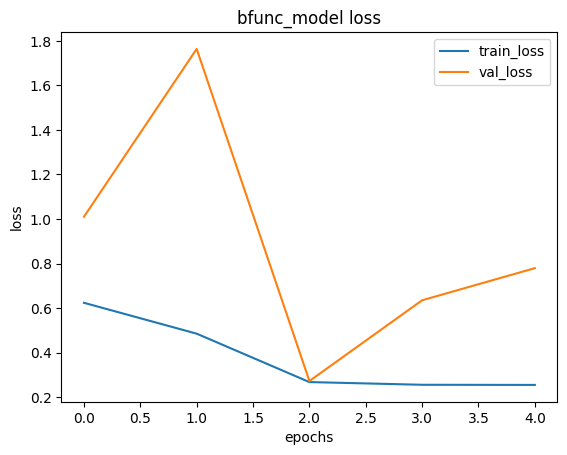

In [45]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('bfunc_model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.show()

# Seperate the feature extraction layers

In [46]:
func_input = Input(shape = (IM_SIZE, IM_SIZE, 3), name='Input_Image')

x = Conv2D(filters=6, kernel_size=3, strides=1, padding='valid', activation='relu')(func_input)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=2, strides=2)(x)

x = Conv2D(filters=16, kernel_size=3, strides=1, padding='valid', activation='relu')(x)
x = BatchNormalization()(x)
output = MaxPool2D(pool_size=2, strides=2)(x)


feature_extractor = Model(func_input, output, name='Feature_extraction_model')
feature_extractor.summary()

Model: "Feature_extraction_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_8 (Bat  (None, 222, 222, 6)       24        
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_9 (Bat  (None, 109, 1

In [47]:
func_input = Input(shape = (IM_SIZE, IM_SIZE, 3), name='Input_Image')

x = feature_extractor(func_input)

x = Flatten()(x)

x = Dense(100, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(10, activation='relu')(x)
x = BatchNormalization()(x)

func_output = Dense(1, activation='sigmoid')(x)



model_with_seperate_feature_extraction_layer = Model(func_input, func_output, name='seperate_feature_extraction_layer_model')
model_with_seperate_feature_extraction_layer.summary()

Model: "seperate_feature_extraction_layer_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 Feature_extraction_model (  (None, 54, 54, 16)        1136      
 Functional)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 46656)             0         
                                                                 
 dense_6 (Dense)             (None, 100)               4665700   
                                                                 
 batch_normalization_10 (Ba  (None, 100)               400       
 tchNormalization)                                               
                                                                 
 dense_7 (Dense)           

In [48]:
model_with_seperate_feature_extraction_layer.compile(optimizer=Adam(learning_rate=0.1),
              loss=BinaryCrossentropy(),
              metrics='accuracy')

In [49]:
history_3 = model_with_seperate_feature_extraction_layer.fit(train_dataset,
                      validation_data=val_dataset,
                      epochs=5,
                      verbose=1)

Epoch 1/5
517/517 [==============================] - 41s 75ms/step - loss: 0.6053 - accuracy: 0.6787 - val_loss: 1.2699 - val_accuracy: 0.4990
Epoch 2/5
517/517 [==============================] - 37s 71ms/step - loss: 0.2832 - accuracy: 0.9034 - val_loss: 0.7286 - val_accuracy: 0.8380
Epoch 3/5
517/517 [==============================] - 41s 79ms/step - loss: 0.2468 - accuracy: 0.9210 - val_loss: 1.8713 - val_accuracy: 0.4994
Epoch 4/5
517/517 [==============================] - 37s 72ms/step - loss: 0.2357 - accuracy: 0.9252 - val_loss: 0.2383 - val_accuracy: 0.9211
Epoch 5/5
517/517 [==============================] - 36s 70ms/step - loss: 0.2185 - accuracy: 0.9331 - val_loss: 0.3251 - val_accuracy: 0.9196


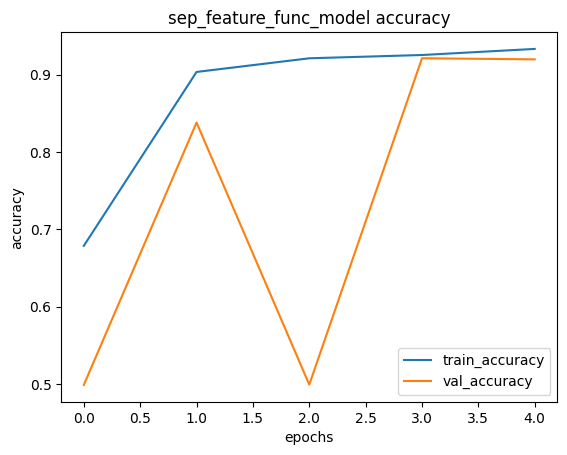

In [50]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('sep_feature_func_model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

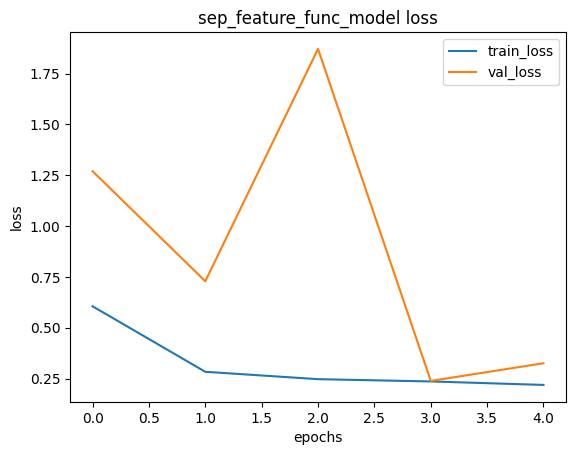

In [51]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('sep_feature_func_model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.show()

# Model Subclassing

In [54]:
from tensorflow.keras.layers import Layer, Conv2D, BatchNormalization, MaxPool2D

In [55]:
class FeatureExtractor(Layer):
  def __init__(self):
    super(FeatureExtractor, self).__init__()

    self.conv_1 = Conv2D(filters=6, kernel_size=3, strides=1, padding='valid', activation='relu')
    self.batch_1 = BatchNormalization()
    self.pool_1 = MaxPool2D(pool_size=2, strides=2)

    self.conv_2 = Conv2D(filters=16, kernel_size=3, strides=1, padding='valid', activation='relu')
    self.batch_2 = BatchNormalization()
    self.pool_2 = MaxPool2D(pool_size=2, strides=2)

  def call(self, x, training):

    x = self.conv_1(x)
    x = self.batch_1(x)
    x = self.pool_1(x)

    x = self.conv_2(x)
    x = self.batch_2(x)
    x = self.pool_2(x)

    return x


feature_sub_classed = FeatureExtractor()

In [56]:
func_input = Input(shape = (IM_SIZE, IM_SIZE, 3), name='Input_Image')

x = feature_sub_classed(func_input)

x = Flatten()(x)

x = Dense(100, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(10, activation='relu')(x)
x = BatchNormalization()(x)

func_output = Dense(1, activation='sigmoid')(x)



sub_classed_feature_extractor = Model(func_input, func_output, name='sub_classed_feature_extractor_model')
sub_classed_feature_extractor.summary()

Model: "sub_classed_feature_extractor_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 feature_extractor (Feature  (None, 54, 54, 16)        1136      
 Extractor)                                                      
                                                                 
 flatten_3 (Flatten)         (None, 46656)             0         
                                                                 
 dense_9 (Dense)             (None, 100)               4665700   
                                                                 
 batch_normalization_14 (Ba  (None, 100)               400       
 tchNormalization)                                               
                                                                 
 dense_10 (Dense)            (N

# Create a model using sub classed instead of layer

In [58]:
class LenetModel(Model):
  def __init__(self):
    super(LenetModel, self).__init__()

    self.feature_extractor = FeatureExtractor()

    self.flatten = Flatten()
    self.dense_1 = Dense(100, activation='relu')
    self.batch_1 = BatchNormalization()
    self.dense_2 = Dense(10, activation='relu')
    self.batch_2 = BatchNormalization()
    self.dense_3 = Dense(1, activation='sigmoid')

  def call(self, x, training):

    x = self.feature_extractor(x)
    x = self.flatten(x)
    x = self.dense_1(x)
    x = self.batch_1(x)
    x = self.dense_2(x)
    x = self.batch_2(x)
    x = self.dense_3(x)

    return x


feature_model_sub_classed = LenetModel()
feature_model_sub_classed(tf.zeros([1, 224, 224, 3]))
feature_model_sub_classed.summary()

Model: "lenet_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor_2 (Featu  multiple                  1136      
 reExtractor)                                                    
                                                                 
 flatten_5 (Flatten)         multiple                  0         
                                                                 
 dense_15 (Dense)            multiple                  4665700   
                                                                 
 batch_normalization_22 (Ba  multiple                  400       
 tchNormalization)                                               
                                                                 
 dense_16 (Dense)            multiple                  1010      
                                                                 
 batch_normalization_23 (Ba  multiple                

In [59]:
feature_model_sub_classed.compile(optimizer=Adam(learning_rate=0.01),
                                  loss = BinaryCrossentropy(),
                                  metrics='accuracy')

In [60]:
fmsc_history = feature_model_sub_classed.fit(train_dataset, validation_data=val_dataset, epochs=5, verbose=1)

Epoch 1/5
517/517 [==============================] - 62s 114ms/step - loss: 0.4875 - accuracy: 0.7628 - val_loss: 0.6858 - val_accuracy: 0.7133
Epoch 2/5
517/517 [==============================] - 37s 71ms/step - loss: 0.2182 - accuracy: 0.9247 - val_loss: 2.0766 - val_accuracy: 0.6128
Epoch 3/5
517/517 [==============================] - 38s 73ms/step - loss: 0.2136 - accuracy: 0.9301 - val_loss: 0.2289 - val_accuracy: 0.9211
Epoch 4/5
517/517 [==============================] - 39s 75ms/step - loss: 0.2041 - accuracy: 0.9307 - val_loss: 0.1938 - val_accuracy: 0.9372
Epoch 5/5
517/517 [==============================] - 44s 85ms/step - loss: 0.1776 - accuracy: 0.9402 - val_loss: 0.3179 - val_accuracy: 0.9336


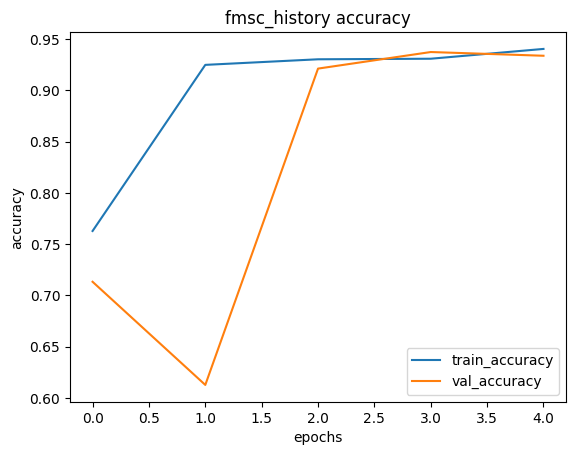

In [61]:
plt.plot(fmsc_history.history['accuracy'])
plt.plot(fmsc_history.history['val_accuracy'])
plt.title('fmsc_history accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

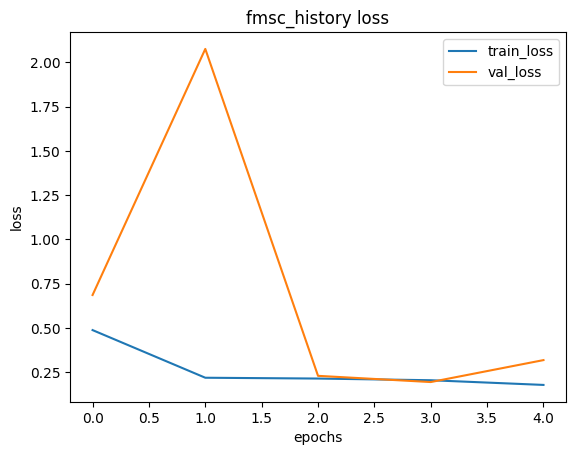

In [62]:
plt.plot(fmsc_history.history['loss'])
plt.plot(fmsc_history.history['val_loss'])
plt.title('fmsc_history loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.show()